In [1]:
from pyspark import SparkContext
import matplotlib.pyplot as plt  

In [2]:
sc = SparkContext(master='local', appName="Olympic")

In [3]:
!ls files

deporte.csv	 deportistaError.csv  modelo_relacional.jpg
deportista2.csv  evento.csv	      paises.csv
deportista.csv	 juegos.csv	      resultados.csv


<img src='./files/modelo_relacional.jpg'>

### Deportistas

In [4]:
deportista_rdd = sc.textFile('files/deportista.csv')\
                    .map(lambda line: line.split(","))

deportista2_rdd = sc.textFile('files/deportista2.csv')\
                    .map(lambda line: line.split(","))

deportista_rdd += deportista2_rdd

In [5]:
deportista_rdd.take(5)

[['deportista_id', 'nombre', 'genero', 'edad', 'altura', 'peso', 'equipo_id'],
 ['1', 'A Dijiang', '1', '24', '180', '80', '199'],
 ['2', 'A Lamusi', '1', '23', '170', '60', '199'],
 ['3', 'Gunnar Nielsen Aaby', '1', '24', '0', '0', '273'],
 ['4', 'Edgar Lindenau Aabye', '1', '34', '0', '0', '278']]

### Equipos

In [6]:
equipo_rdd = sc.textFile('files/paises.csv')\
                    .map(lambda line: line.split(","))

equipo_rdd.take(5)

[['id', 'equipo', 'sigla'],
 ['1', '30. Februar', 'AUT'],
 ['2', 'A North American Team', 'MEX'],
 ['3', 'Acipactli', 'MEX'],
 ['4', 'Acturus', 'ARG']]

### Resultados

In [7]:
resultados_rdd = sc.textFile('files/resultados.csv')\
                    .map(lambda line: line.split(","))

resultados_rdd.take(5)

[['resultado_id', 'medalla', 'deportista_id', 'juego_id', 'evento_id'],
 ['1', 'NA', '1', '39', '1'],
 ['2', 'NA', '2', '49', '2'],
 ['3', 'NA', '3', '7', '3'],
 ['4', 'Gold', '4', '2', '4']]

## Respondiendo Preguntas

### Cantidad de Deportistas

In [8]:
deportista_rdd.count()-1

135571

### Rango de Edades top 10


In [9]:
edades_deportistas = deportista_rdd.map(lambda x: [x[3], x[0]]) \
                        .groupByKey()\
                        .mapValues(len)\
                        .sortByKey()\
                        .collect()

sorted(edades_deportistas, key=lambda x: -x[1])[:10]

[('22', 12981),
 ('23', 12942),
 ('21', 12045),
 ('24', 11777),
 ('25', 10084),
 ('20', 9541),
 ('26', 8533),
 ('19', 7061),
 ('27', 7019),
 ('0', 6368)]

<BarContainer object of 75 artists>

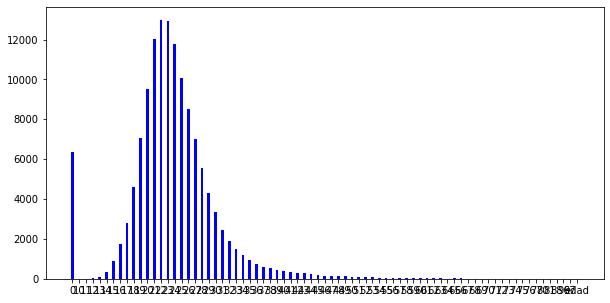

In [10]:
edad = [data[0] for data in edades_deportistas]
valor = [data[1] for data in edades_deportistas]

fig = plt.figure(figsize = (10, 5)) 
plt.bar(edad, valor, color ='blue',  
        width = 0.4) 

### Distribucion Sexo


In [11]:
generos = list(deportista_rdd.map(lambda x: x[2]).countByValue().items())[1:]

In [12]:
[data[1] for data in generos]

[101590, 33981]

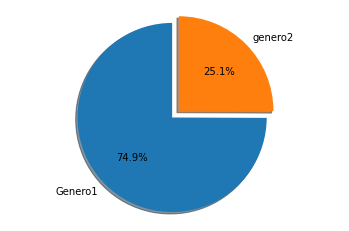

In [13]:
fig1, ax1 = plt.subplots()

labels = 'Genero1', 'genero2'
genres = [data[1] for data in generos]
explode = (0, 0.1) 

ax1.pie(genres, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Cantidad de participantes por Pais

In [19]:
deportistas_paises = deportistas_paises_rdd.groupByKey() \
                        .mapValues(len)\
                        .sortBy(lambda x: -x[1])\
                        .take(10)

deportistas_paises

[('USA', 9621),
 ('GBR', 6244),
 ('FRA', 6161),
 ('ITA', 4918),
 ('CAN', 4789),
 ('GER', 4612),
 ('JPN', 4066),
 ('AUS', 3799),
 ('SWE', 3790),
 ('POL', 2966)]

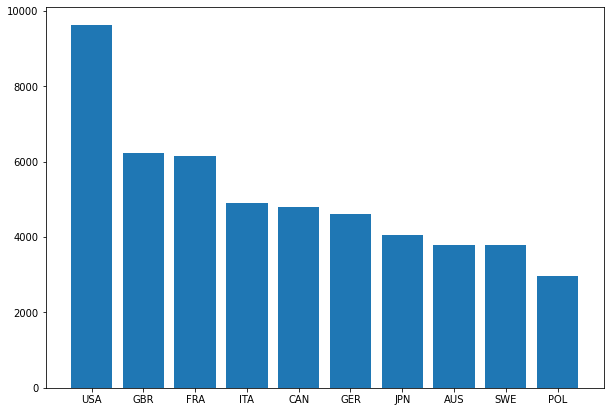

In [21]:
pais = [data[0] for data in deportistas_paises]
cantidad = [data[1] for data in deportistas_paises]
  
# Figure Size 
fig = plt.figure(figsize =(10, 7)) 
  
# Horizontal Bar Plot 
plt.bar(pais[0:10], cantidad[0:10]) 
  
# Show Plot 
plt.show() 

### Top 20 deportistas mas medallas


In [26]:
header = medals.first()

medals = resultados_rdd.map(lambda m: [m[2], m[1]]) \
        .filter(lambda x: x[1] != 'NA')\
        .filter(lambda x: x != header)

    medals.take(5)

[['4', 'Gold'],
 ['15', 'Bronze'],
 ['15', 'Bronze'],
 ['16', 'Bronze'],
 ['17', 'Bronze']]

In [53]:
medals_rdd = medals.map(lambda x: [x[0], x[1]]) \
                .groupBy(lambda x: x[0])\
                .mapValues(len) \
                .sortBy(lambda x: -x[1])
    
medals_rdd.take(10)

[('94406', 28),
 ('67046', 18),
 ('4198', 15),
 ('11951', 13),
 ('74420', 13),
 ('89187', 13),
 ('109161', 13),
 ('23426', 12),
 ('35550', 12),
 ('57998', 12)]

In [123]:
deportistas_medallas = deportista_rdd.map(lambda x: x[:2]) \
                        .join(medals_rdd.map(lambda x: [x[0], x[1]])) \
                        .map(lambda x: (x[0], x[1][0], x[1][1])) \
                        .sortBy(lambda x: -x[2])
                        
            
deportistas_medallas.take(20)


[('94406', 'Michael Fred Phelps', 28),
 ('67046', 'Larysa Semenivna Latynina Diriy ', 18),
 ('4198', 'Nikolay Yefimovich Andrianov', 15),
 ('89187', 'Takashi Ono', 13),
 ('109161', 'Borys Anfiyanovych Shakhlin', 13),
 ('11951', 'Ole Einar Bjrndalen', 13),
 ('74420', 'Edoardo Mangiarotti', 13),
 ('57998', 'Sawao Kato', 12),
 ('23426', 'Natalie Anne Coughlin Hall ', 12),
 ('70965', 'Ryan Steven Lochte', 12),
 ('121258', 'Dara Grace Torres Hoffman Minas ', 12),
 ('35550', 'Birgit FischerSchmidt', 12),
 ('85286', 'Aleksey Yuryevich Nemov', 12),
 ('87390', 'Paavo Johannes Nurmi', 12),
 ('119922', 'Jennifer Elisabeth Jenny Thompson Cumpelik ', 12),
 ('11642', 'Matthew Nicholas Matt Biondi', 11),
 ('21402', 'Viktor Ivanovych Chukarin', 11),
 ('18826', 'Vra slavsk Odloilov ', 11),
 ('89706', 'Carl Townsend Osburn', 11),
 ('113912', 'Mark Andrew Spitz', 11)]

### Medallas por pais top 20


In [304]:
deportista_pais_medalla.map(lambda x: [x[1], x[2]]).groupByKey() \
                        .mapValues(len)\
                        .sortBy(lambda x: -x[1])\
                        .take(20)

[('USA', 5643),
 ('URS', 2660),
 ('GER', 2045),
 ('GBR', 2045),
 ('FRA', 1785),
 ('ITA', 1627),
 ('SWE', 1537),
 ('CAN', 1347),
 ('AUS', 1314),
 ('HUN', 1131),
 ('GDR', 1084),
 ('NED', 1039),
 ('NOR', 1033),
 ('RUS', 1003),
 ('CHN', 991),
 ('JPN', 913),
 ('FIN', 900),
 ('SUI', 690),
 ('ROU', 658),
 ('KOR', 642)]